<a href="https://colab.research.google.com/github/nmadhumi/Data/blob/main/INCIDENT_IMPACT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**EXPLORATORY DATA ANALYSIS**

DATA PREPROCESSING STEPS

1.Acquire the dataset.

2.Import all the crucial libraries.

3.Import the dataset.

4.Identifying and handling the missing values.

5.Encoding the categorical data . 

6.Splitting the dataset .

 7.Feature scaling .



Loading the Data

In [2]:
df=pd.read_csv(r'/content/data (1).csv')
df.head()

,Unnamed: 0,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,1,INC0000045,New,True,0,0,0,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
1,3,INC0000045,Resolved,True,0,0,3,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
2,4,INC0000045,Closed,False,0,0,4,Caller 2403,Opened by 8,29-02-2016 01:16,...,Category 55,Symptom 72,Group 56,?,True,False,2 - Medium,Do Not Notify,?,?
3,6,INC0000047,Active,True,1,0,1,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?
4,7,INC0000047,Active,True,1,0,2,Caller 2403,Opened by 397,29-02-2016 04:40,...,Category 40,Symptom 471,Group 24,Resolver 31,True,False,2 - Medium,Do Not Notify,?,?


In [3]:
df.shape    #There are 99198 rows and 26 columns or features

(99198, 26)

In [4]:
#checking for null values
df.isnull().sum()

Unnamed: 0            0
ID                    0
ID_status             0
active                0
count_reassign        0
count_opening         0
count_updated         0
ID_caller             0
opened_by             0
opened_time           0
Created_by            0
created_at            0
updated_by            0
updated_at            0
type_contact          0
location              0
category_ID           0
user_symptom          0
Support_group         0
support_incharge      0
Doc_knowledge         0
confirmation_check    0
impact                0
notify                0
problem_ID            0
change_request        0
dtype: int64

In [5]:
#GAINING INFORMATION ABOUT THE DATA SET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99198 entries, 0 to 99197
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          99198 non-null  int64 
 1   ID                  99198 non-null  object
 2   ID_status           99198 non-null  object
 3   active              99198 non-null  bool  
 4   count_reassign      99198 non-null  int64 
 5   count_opening       99198 non-null  int64 
 6   count_updated       99198 non-null  int64 
 7   ID_caller           99198 non-null  object
 8   opened_by           99198 non-null  object
 9   opened_time         99198 non-null  object
 10  Created_by          99198 non-null  object
 11  created_at          99198 non-null  object
 12  updated_by          99198 non-null  object
 13  updated_at          99198 non-null  object
 14  type_contact        99198 non-null  object
 15  location            99198 non-null  object
 16  category_ID         99

In [6]:
df['impact'].value_counts()   # This is the target column

2 - Medium    94034
3 - Low        2720
1 - High       2444
Name: impact, dtype: int64

In [7]:
# Knowing all Columns
df.columns

Index(['Unnamed: 0', 'ID', 'ID_status', 'active', 'count_reassign',
       'count_opening', 'count_updated', 'ID_caller', 'opened_by',
       'opened_time', 'Created_by', 'created_at', 'updated_by', 'updated_at',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'Doc_knowledge',
       'confirmation_check', 'impact', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')

Checking for Unique values in columns

In [8]:
#since there are 26 columns a for loop is created to check unique values
def print_unique_col_values(df):
       for columns in df.columns:
               if df[columns].dtypes=='object':
                       print(f'{columns}: {df[columns].unique()}')

In [9]:
df['count_reassign'].value_counts()

0     48853
1     26027
2     10503
3      5777
4      3244
5      1830
6      1017
7       692
8       406
9       262
10      214
11      130
12       85
13       44
14       36
20       13
15       13
18       11
17       11
16        9
19        7
22        6
23        2
26        2
24        1
25        1
27        1
21        1
Name: count_reassign, dtype: int64

In [10]:
df['count_opening'].value_counts()  

0    97571
1     1340
2      134
3       77
4       41
6       14
5       13
7        5
8        3
Name: count_opening, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

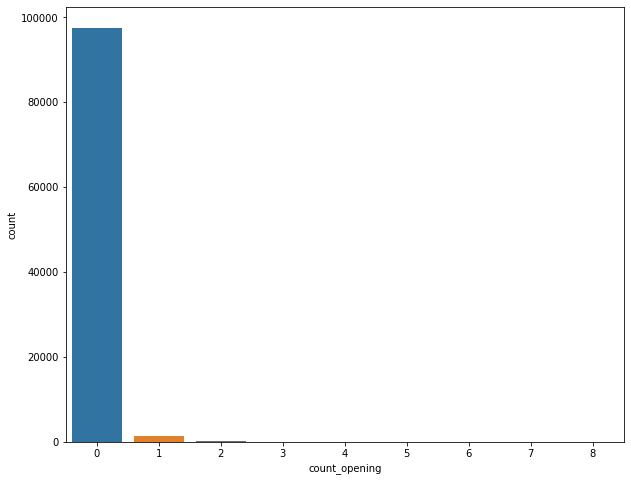

In [11]:
#visualizing the Number of times the incident resolution was rejected by the caller
plt.figure(figsize=(10,8))
x=df['count_opening']
sns.countplot(data=df,x=df['count_opening'])
plt.show
#The graph shows that majority of the times resolution was accepted by the user.

In [12]:
df['count_updated'].value_counts()

0      17361
1      15502
2      13851
3       9919
4       7546
       ...  
103        1
99         1
97         1
98         1
100        1
Name: count_updated, Length: 113, dtype: int64

In [13]:
df['ID_caller'].value_counts()

Caller 1904    1001
Caller 290      552
Caller 4514     496
Caller 1441     218
Caller 298      203
               ... 
Caller 1527       1
Caller 4969       1
Caller 933        1
Caller 195        1
Caller 1899       1
Name: ID_caller, Length: 5223, dtype: int64

In [14]:
df['Support_group'].value_counts()

Group 70    30357
?            9994
Group 25     5421
Group 24     4717
Group 20     4293
            ...  
Group 7         4
Group 11        1
Group 4         1
Group 38        1
Group 41        1
Name: Support_group, Length: 78, dtype: int64

In [15]:
df['active'].value_counts()

True     81810
False    17388
Name: active, dtype: int64

In [16]:
df['type_contact'].value_counts()

Phone             98306
Self service        714
Email               153
Direct opening       14
IVR                  11
Name: type_contact, dtype: int64

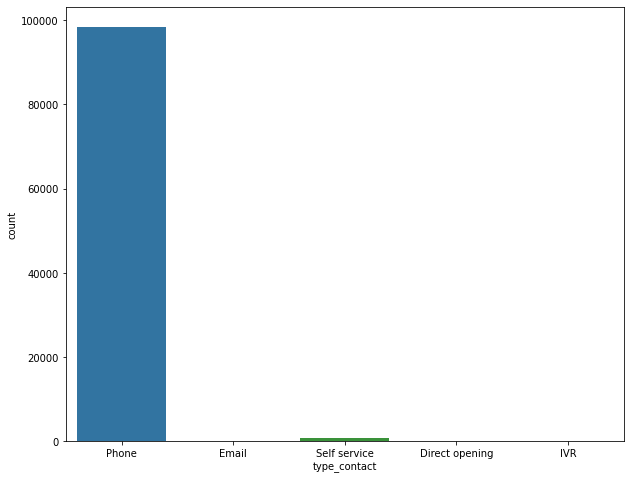

In [17]:
#visualizing by what means the incident was reported
plt.figure(figsize=(10,8))
x=df['type_contact']
sns.countplot(data=df,x=df['type_contact'])
plt.show()
#The graph shows that the incident was mostly reported by phone

In [18]:
#The 'type_contact' does not play a significant role in model building as more than 98 % of the values are similar.so we can drop this column
df.drop('type_contact',axis=1,inplace=True)

In [19]:
df['location'].value_counts()

Location 204    22295
Location 161    15867
Location 143    13463
Location 108     8870
Location 93      7980
                ...  
Location 211        2
Location 166        1
Location 181        1
Location 132        1
Location 203        1
Name: location, Length: 225, dtype: int64

In [20]:
df['category_ID'].value_counts()
#From this it is understandable incident reports are more from the service under category 26 label

Category 26    12937
Category 53    11282
Category 42    11130
Category 46     9268
Category 23     5505
Category 9      5182
Category 32     5065
Category 37     4629
Category 57     4527
Category 20     3863
Category 61     3652
Category 24     3147
Category 34     2778
Category 40     2634
Category 45     2527
Category 51     1674
Category 28     1584
Category 35     1408
Category 44     1249
Category 19     1095
Category 13      695
Category 43      601
Category 55      568
Category 17      351
Category 22      285
Category 56      224
Category 38      199
Category 8       175
Category 7       143
Category 54      108
Category 33      102
Category 50       69
Category 31       69
Category 2        58
?                 56
Category 63       54
Category 21       52
Category 47       30
Category 59       29
Category 41       26
Category 5        23
Category 29       22
Category 10       21
Category 25       18
Category 62       17
Category 52       14
Category 4        14
Category 48  

In [21]:
#Although most incident reports are from category 26 label,the impact is primarily medium only
df[df.category_ID=='Category 26'].impact.sort_values().value_counts()

2 - Medium    12649
3 - Low         221
1 - High         67
Name: impact, dtype: int64

In [22]:
df['user_symptom'].value_counts()

Symptom 491    36496
?              23139
Symptom 534     3852
Symptom 387     1809
Symptom 4       1794
               ...  
Symptom 80         1
Symptom 243        1
Symptom 313        1
Symptom 326        1
Symptom 407        1
Name: user_symptom, Length: 516, dtype: int64

In [23]:
df[df.user_symptom=='Symptom 491'].impact.sort_values().value_counts()

2 - Medium    34777
3 - Low         895
1 - High        824
Name: impact, dtype: int64

In [24]:
df['Support_group'].value_counts()  #78 different support groups and 'Group 70' deals with one-third of the incidents reported

Group 70    30357
?            9994
Group 25     5421
Group 24     4717
Group 20     4293
            ...  
Group 7         4
Group 11        1
Group 4         1
Group 38        1
Group 41        1
Name: Support_group, Length: 78, dtype: int64

In [25]:
df[df['Support_group']=='Group 70'].impact.sort_values().value_counts()

2 - Medium    29113
3 - Low         959
1 - High        285
Name: impact, dtype: int64

In [26]:
df['support_incharge'].value_counts() #232 support_incharge of the incident

?               19302
Resolver 17      7511
Resolver 13      6135
Resolver 194     2492
Resolver 57      2196
                ...  
Resolver 131        1
Resolver 220        1
Resolver 38         1
Resolver 67         1
Resolver 102        1
Name: support_incharge, Length: 232, dtype: int64

In [27]:
df[df.Doc_knowledge==False].impact.value_counts()

2 - Medium    77791
1 - High       1941
3 - Low        1650
Name: impact, dtype: int64

In [28]:
df[df.Doc_knowledge==True].impact.value_counts()
#The usage of knowledge base document did not increase  the impact rating score
#Major high impact cases were resolved without knowledge base document

2 - Medium    16243
3 - Low        1070
1 - High        503
Name: impact, dtype: int64

In [29]:
df['confirmation_check'].value_counts()


False    70526
True     28672
Name: confirmation_check, dtype: int64

In [30]:
#As 'confirmation_check' column is not relevant in our model building we can drop the column
df.drop('confirmation_check',axis=1,inplace=True)

In [31]:
df['change_request'].value_counts()

?             98512
CHG0001230       15
CHG0000132       13
CHG0000342       12
CHG0000047       12
              ...  
CHG0003305        1
CHG0001389        1
CHG0000648        1
CHG0001831        1
CHG0000534        1
Name: change_request, Length: 178, dtype: int64

In [32]:
df['problem_ID'].value_counts()

?                  97620
Problem ID  14       114
Problem ID  2        112
Problem ID  52        55
Problem ID  239       35
                   ...  
Problem ID  178        1
Problem ID  136        1
Problem ID  143        1
Problem ID  62         1
Problem ID  229        1
Name: problem_ID, Length: 242, dtype: int64

In [33]:
#  Dropping Unnecessary columns

#In the columns 'problem_ID' and 'change_request' more than 95% of the rows  are '?' .So we can remove the two columns as it is of no use in our model building.

In [34]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('change_request',axis=1,inplace=True)
df.drop('problem_ID',axis=1,inplace=True)


In [35]:
df['notify'].value_counts()  ##Around 98% of the time, notifications were not generated

Do Not Notify    99113
Send Email          85
Name: notify, dtype: int64

In [36]:
#As 'Notify' column is not relevant in model building we can drop the column
df.drop('notify',axis=1,inplace=True)

In [37]:
df['ID_status'].value_counts()# From here we can understand that more than 50% of cases are Active and new

Active                27075
New                   25515
Resolved              18158
Closed                17387
Awaiting User Info    10235
Awaiting Vendor         493
Awaiting Problem        307
Awaiting Evidence        26
-100                      2
Name: ID_status, dtype: int64

In [38]:
df['ID'].value_counts()  # There are 24569 different Incident identifiers

INC0044260    41
INC0019396    41
INC0020718    34
INC0012815    33
INC0007349    32
              ..
INC0010445     1
INC0031947     1
INC0006129     1
INC0006128     1
INC0027672     1
Name: ID, Length: 24569, dtype: int64

In [39]:
df['active'].value_counts()

True     81810
False    17388
Name: active, dtype: int64

In [40]:
df[df.active==True].impact.value_counts()

2 - Medium    77455
3 - Low        2194
1 - High       2161
Name: impact, dtype: int64

In [41]:
df['opened_by'].value_counts()
#About one third of the total incidents were reported by the same user(17)

Opened by  17     29027
Opened by  24      5658
Opened by  131     5113
Opened by  108     4234
Opened by  55      3917
                  ...  
Opened by  277        2
Opened by  7          2
Opened by  160        1
Opened by  528        1
Opened by  211        1
Name: opened_by, Length: 208, dtype: int64

In [42]:
df[df.opened_by=='Opened by  17'].impact.value_counts()
#There is no correlation between opened_by and impact,so we can drop the column

2 - Medium    28581
1 - High        417
3 - Low          29
Name: impact, dtype: int64

In [43]:
df.drop('opened_by',axis=1,inplace=True)

In [44]:
df['Created_by'].value_counts()
#Poor data quality is noted in this column.Around 37000 rows have no data.The only option here is to fill with Mode value of the column.But that brings an imbalance.
#So we will drop the column

?                 37174
Created by 10     16968
Created by 13      3146
Created by 62      2790
Created by 52      2457
                  ...  
Created by 57         3
Created by 46         3
Created by 165        2
Created by 73         1
Created by 159        1
Name: Created_by, Length: 186, dtype: int64

In [45]:
df.drop('Created_by',axis=1,inplace=True)

In [46]:
df['updated_by'].value_counts()

Updated by 908    25190
Updated by 44      8845
Updated by 60      4951
Updated by 429     2918
Updated by 859     1760
                  ...  
Updated by 173        1
Updated by 170        1
Updated by 638        1
Updated by 24         1
Updated by 907        1
Name: updated_by, Length: 751, dtype: int64

In [47]:
#As updated_by column is not relevant we can drop the two columns
df.drop('updated_by',axis=1,inplace=True)


In [48]:
df.shape

(99198, 17)

In [49]:
df.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'ID_caller', 'opened_time', 'created_at', 'updated_at',
       'location', 'category_ID', 'user_symptom', 'Support_group',
       'support_incharge', 'Doc_knowledge', 'impact'],
      dtype='object')

In [50]:
df.head(2)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_time,created_at,updated_at,location,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,impact
0,INC0000045,New,True,0,0,0,Caller 2403,29-02-2016 01:16,29-02-2016 01:23,29-02-2016 01:23,Location 143,Category 55,Symptom 72,Group 56,?,True,2 - Medium
1,INC0000045,Resolved,True,0,0,3,Caller 2403,29-02-2016 01:16,29-02-2016 01:23,29-02-2016 11:29,Location 143,Category 55,Symptom 72,Group 56,?,True,2 - Medium


**Feature Engineering**

**Converting to Date Time format**

Extracting Day,Month,Hour and Minute from [opened_time	created_at	updated_at]	

In [51]:
df['opened_day']=pd.to_datetime(df['opened_time']).dt.day
df['opened_month']=pd.to_datetime(df['opened_time']).dt.month
df['opened_hour']=pd.to_datetime(df['opened_time']).dt.hour
df['opened_minute']=pd.to_datetime(df['opened_time']).dt.minute

In [52]:
df.head(2)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_time,created_at,updated_at,...,category_ID,user_symptom,Support_group,support_incharge,Doc_knowledge,impact,opened_day,opened_month,opened_hour,opened_minute
0,INC0000045,New,True,0,0,0,Caller 2403,29-02-2016 01:16,29-02-2016 01:23,29-02-2016 01:23,...,Category 55,Symptom 72,Group 56,?,True,2 - Medium,29,2,1,16
1,INC0000045,Resolved,True,0,0,3,Caller 2403,29-02-2016 01:16,29-02-2016 01:23,29-02-2016 11:29,...,Category 55,Symptom 72,Group 56,?,True,2 - Medium,29,2,1,16


In [53]:
#df['created_day']=pd.to_datetime(df['created_at']).dt.day
#df['created_month']=pd.to_datetime(df['created_at']).dt.month
#df['created_hour']=pd.to_datetime(df['created_at']).dt.hour
#df['created_minute']=pd.to_datetime(df['created_at']).dt.minute
#This column has multiple data missing ,so we are dropping the 'created_at'column

In [54]:
df.drop('created_at',axis=1,inplace=True)

In [55]:
df['updated_day']=pd.to_datetime(df['updated_at']).dt.day
df['updated_month']=pd.to_datetime(df['updated_at']).dt.month
df['updated_hour']=pd.to_datetime(df['updated_at']).dt.hour
df['updated_minute']=pd.to_datetime(df['updated_at']).dt.minute

In [56]:
df.head(2)
#Day,Month and Year columns have been added to the data frame

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_time,updated_at,location,...,Doc_knowledge,impact,opened_day,opened_month,opened_hour,opened_minute,updated_day,updated_month,updated_hour,updated_minute
0,INC0000045,New,True,0,0,0,Caller 2403,29-02-2016 01:16,29-02-2016 01:23,Location 143,...,True,2 - Medium,29,2,1,16,29,2,1,23
1,INC0000045,Resolved,True,0,0,3,Caller 2403,29-02-2016 01:16,29-02-2016 11:29,Location 143,...,True,2 - Medium,29,2,1,16,29,2,11,29


**Data Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

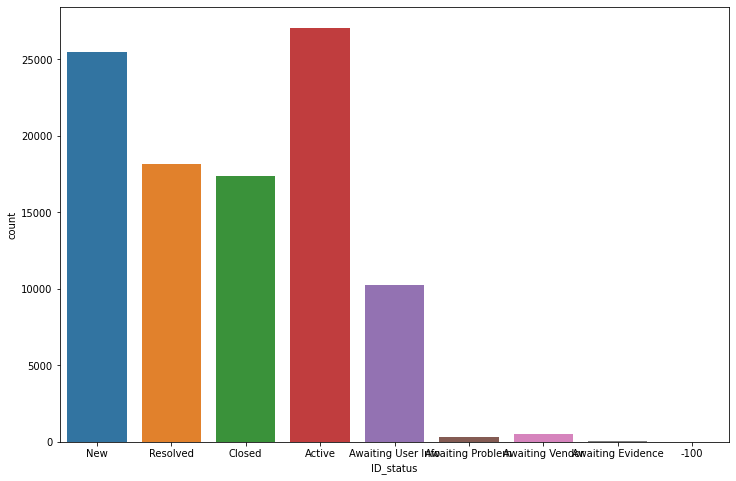

In [57]:
#visualizing the ID_status
plt.figure(figsize=(12,8))
x=df['ID_status']
sns.countplot(data=df,x=df['ID_status'])
plt.show

In [58]:
#From here we can understand that more than 50% of incidents are Active and New

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


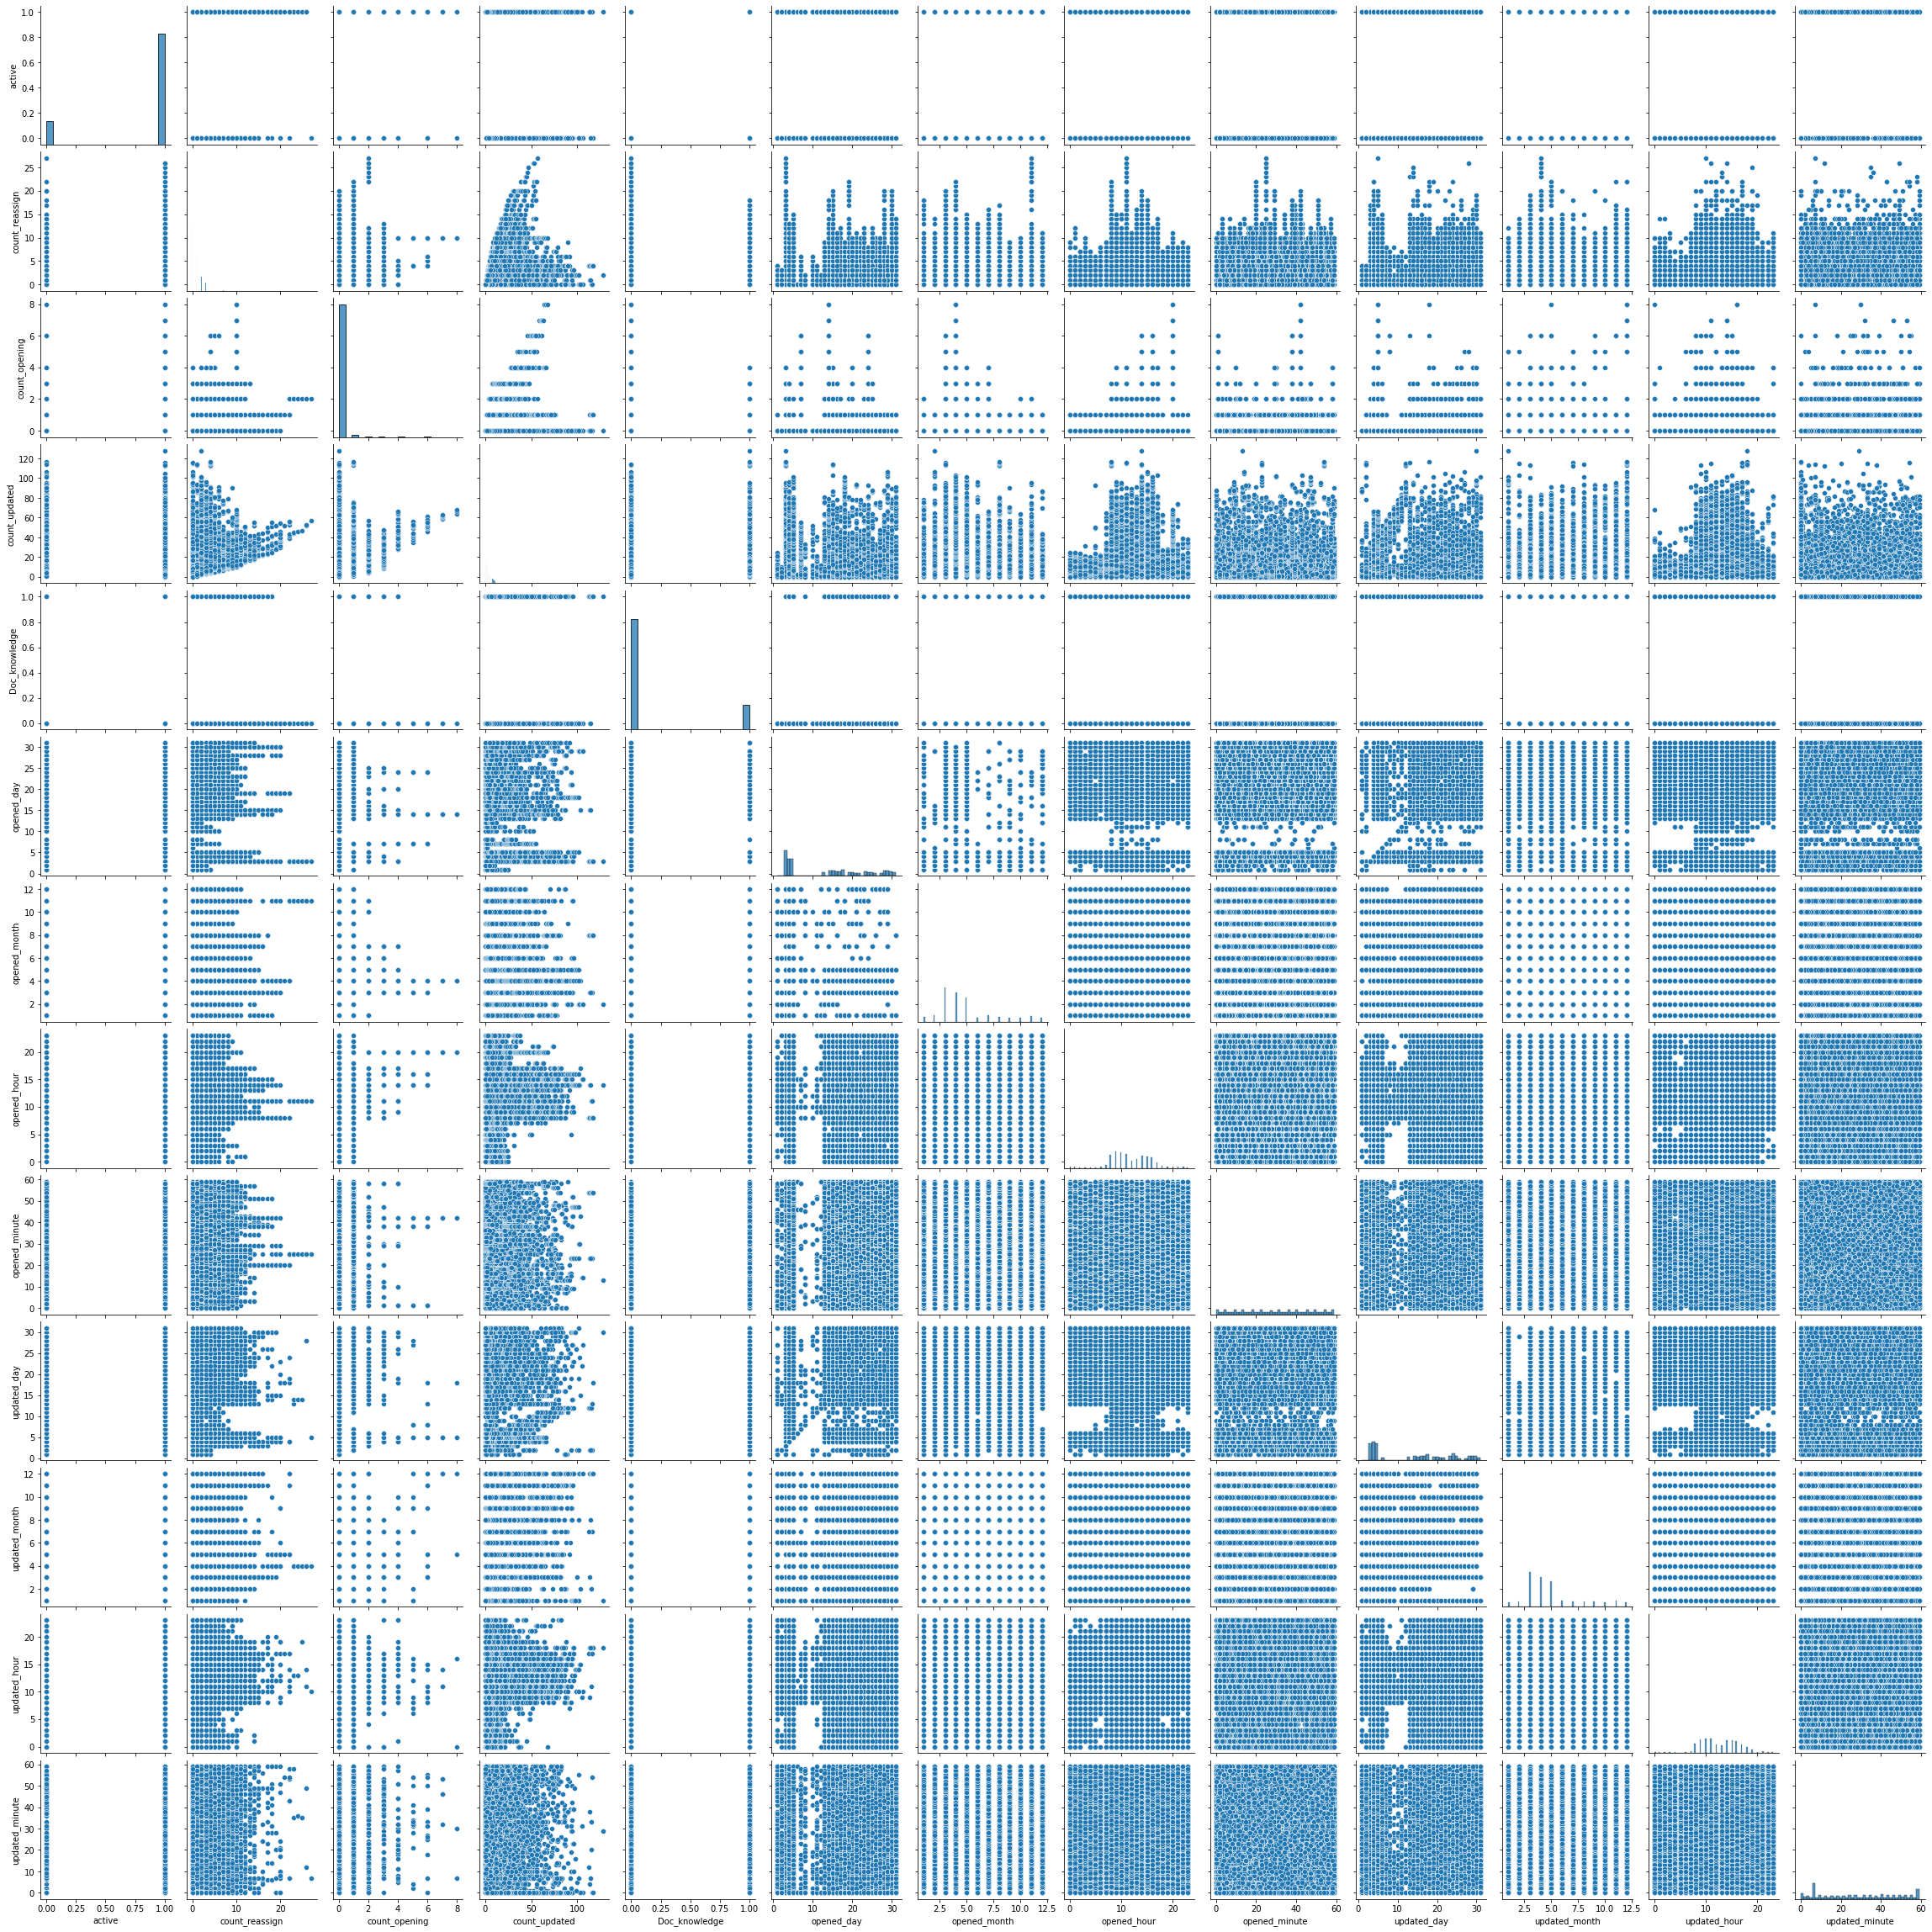

In [59]:
sns.pairplot(df)

<Axes: >

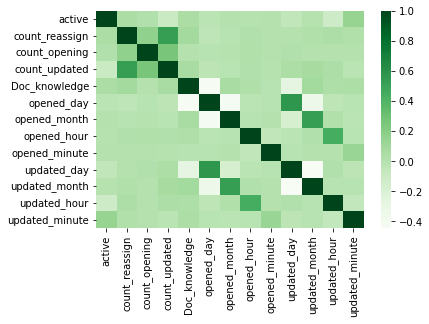

In [60]:
sns.heatmap(df.corr(),cmap='Greens')

In [61]:
df.head(3)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_time,updated_at,location,...,Doc_knowledge,impact,opened_day,opened_month,opened_hour,opened_minute,updated_day,updated_month,updated_hour,updated_minute
0,INC0000045,New,True,0,0,0,Caller 2403,29-02-2016 01:16,29-02-2016 01:23,Location 143,...,True,2 - Medium,29,2,1,16,29,2,1,23
1,INC0000045,Resolved,True,0,0,3,Caller 2403,29-02-2016 01:16,29-02-2016 11:29,Location 143,...,True,2 - Medium,29,2,1,16,29,2,11,29
2,INC0000045,Closed,False,0,0,4,Caller 2403,29-02-2016 01:16,05-03-2016 12:00,Location 143,...,True,2 - Medium,29,2,1,16,3,5,12,0


In [62]:
df.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'ID_caller', 'opened_time', 'updated_at', 'location',
       'category_ID', 'user_symptom', 'Support_group', 'support_incharge',
       'Doc_knowledge', 'impact', 'opened_day', 'opened_month', 'opened_hour',
       'opened_minute', 'updated_day', 'updated_month', 'updated_hour',
       'updated_minute'],
      dtype='object')

**Label Encoding  on Categorical variables**

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le=LabelEncoder()

In [65]:
df['ID_status_le']=le.fit_transform(df['ID_status'])

In [66]:
df['location_le']=le.fit_transform(df['location'])

In [67]:
df['category_ID_le']=le.fit_transform(df['category_ID'])

In [68]:
df['impact_le']=le.fit_transform(df['impact'])

In [69]:
df['impact_le'].value_counts()   #{0:High,1:Medium,2:Low}

1    94034
2     2720
0     2444
Name: impact_le, dtype: int64

**MODEL BUILDING**

Importing the necessary libraries for model building

To solve this problem, we can use a supervised learning algorithm to train a model that can predict the impact value of an incident based on its features. The model can be trained on historical data of incidents and their corresponding impact values.

We can try with Logistic regression,Random Forest classifier and XGBoost

Comparing the accuracy we can finalize the Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier

Splitting the data into x and y (independent and dependent)

In [71]:
x=df[['count_reassign','count_opening','count_updated','opened_day','opened_month','opened_hour','opened_minute','updated_day','updated_month','updated_hour','updated_minute','ID_status_le','location_le','category_ID_le']]
y=df['impact_le']  #Target

In [105]:
x.columns

Index(['count_reassign', 'count_opening', 'count_updated', 'opened_day',
       'opened_month', 'opened_hour', 'opened_minute', 'updated_day',
       'updated_month', 'updated_hour', 'updated_minute', 'ID_status_le',
       'location_le', 'category_ID_le'],
      dtype='object')

In [72]:
x.shape

(99198, 14)

In [73]:
y.shape

(99198,)

<Axes: >

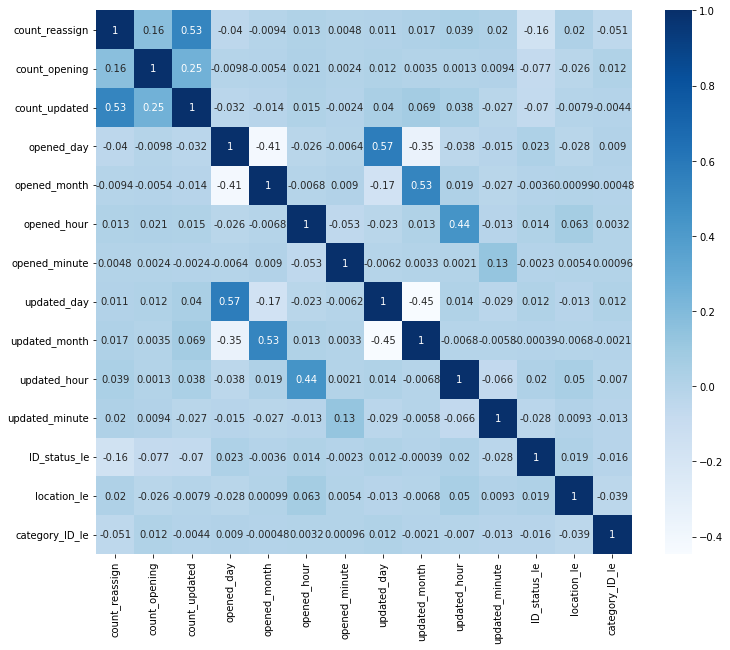

In [109]:
plt.figure(figsize=(12,10))
sns.heatmap(x.corr(),cmap="Blues",annot=True)

Splitting data into training and testing sets

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [75]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(69438, 14)
(29760, 14)
(69438,)
(29760,)


In [76]:
#First we use logistic regression to train the model
model1=LogisticRegression()
model1.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
#Evaluating the model on Testing data
y_pred=model1.predict(x_test)

In [78]:
#Evaluating the model on training data
y_pred_train=model1.predict(x_train)

Checking Accuracy of Logistic Regression Model1

In [79]:
score_train=accuracy_score(y_train,y_pred_train)
print(score_train)

0.9474063193064316


In [80]:
#Here we cannot just rely on Accuracy score alone because the target column has a highly imbalanced data(medium impact comprising 95 % of the output),
#so we have to consider the classification report for checking accuracy


In [81]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       732
           1       0.95      1.00      0.97     28248
           2       0.00      0.00      0.00       780

    accuracy                           0.95     29760
   macro avg       0.32      0.33      0.32     29760
weighted avg       0.90      0.95      0.92     29760



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Logistic Regression is not acceptable as precision ,recall and f1-score are not acceptable

**Random Forest Classifier**

In [82]:
model2=RandomForestClassifier()

In [83]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
#Evaluating the model on Training Data
y_pred_rf=model2.predict(x_test)

In [85]:
#Evaluating the model on training data
y_pred_trainrf=model2.predict(x_train)

Checking Acccuracy of Random Forest model2

In [86]:
score_rftrain=accuracy_score(y_train,y_pred_trainrf)
print(score_rftrain)

0.9999711973271119


In [87]:
score_rftest=accuracy_score(y_test,y_pred_rf)
print(score_rftest)

0.963239247311828


In [88]:
print (classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.33      0.49       732
           1       0.96      1.00      0.98     28248
           2       0.95      0.26      0.41       780

    accuracy                           0.96     29760
   macro avg       0.95      0.53      0.62     29760
weighted avg       0.96      0.96      0.95     29760



The Accuracy score of training and testing data sets in Random forest classifier is 99% and 96% respectively .so this algorithm can be accepted.

**Making a Predictive System**

In [104]:
input_data=(0,0,0,29,2,1,16,29,2,1,23,7,44,45)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The impact is High')
elif (prediction[0]==1):
      print('The impact is Medium')
else:
  print('The impact is a Low')

[1]
The impact is Medium


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Predicted using  given data points and the prediction is accurate